<a href="https://colab.research.google.com/github/liviagadelha/projetotcc/blob/main/projeto_servidores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gender-guesser

import gender_guesser.detector as gender
import json, requests
import urllib.request as urllib2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 7.5 MB/s eta 0:00:00


In [ ]:
url = "https://dados.ifrn.edu.br/dataset/0c5c1c1a-7af8-4f24-ba37-a9eda0baddbb/resource/c3f64d5b-f2df-4ef2-8e27-fb4f10a7c3ea/download/dados_extraidos_recursos_servidores.json"

arquivo = requests.get(url)

In [ ]:
if arquivo.status_code == 200:
  arquivo = json.dumps(arquivo.json())

df = pd.read_json(arquivo)
df.info()

# for index, row in df.iterrows():
#     if len(row['funcao'])>0:
#       print(row['funcao'])

# df['funcao'].value_counts()
# df['cargo'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   categoria                 2972 non-null   object
 1   cargo                     2866 non-null   object
 2   setor_siape               2970 non-null   object
 3   disciplina_ingresso       2972 non-null   object
 4   setor_suap                2971 non-null   object
 5   nome                      2972 non-null   object
 6   funcao                    2972 non-null   object
 7   jornada_trabalho          2972 non-null   object
 8   telefones_institucionais  2972 non-null   object
 9   matricula                 2972 non-null   int64 
 10  curriculo_lattes          2972 non-null   object
 11  campus                    2972 non-null   object
 12  url_foto_75x100           2972 non-null   object
dtypes: int64(1), object(12)
memory usage: 302.0+ KB


In [ ]:
servidores = json.loads(arquivo)
d = gender.Detector()

# Pré-processamento (definições de genêros)

generos = {}
names = {}
unknown_names = {}

for servidor in servidores:
  prinome = servidor['nome'].split()
  genero = d.get_gender(prinome[0])

  if genero in ['mostly_female', 'mostly_male', 'andy']:
    if prinome[0] not in names.keys():
      names[prinome[0]] = (prinome[0], prinome[1], genero)

  elif genero == 'unknown':
    if prinome[0] not in unknown_names:
      unknown_names[prinome[0]] = (prinome[0], prinome[1])

#list names with mostly and andy gender
# for p in names.keys():
#   print(f"[{names[p][2]}] {p} {names[p][1]}")

# list names with unknown gender
# for n in unknown_names.keys():
#   print(f"{unknown_names[n]}")

# print(len(unknown_names))

for servidor in servidores:
  prinome = servidor['nome'].split()
  genero = d.get_gender(prinome[0])

  if genero in generos.keys():
    generos[genero] += 1
  else:
    generos[genero] = 1

  # print("[%s] %s - %s" % (genero,  servidor['setor_siape'], servidor['nome']))


print(generos)

{'female': 718, 'unknown': 1024, 'mostly_male': 5, 'male': 1216, 'andy': 4, 'mostly_female': 5}


In [ ]:
# JSON / Dict de definição de generos para os nomes com desconhecido / unknown

tg = {
'Abimael': 'male',
'Abinoam': 'male',
'Abrao': 'male',
'Abrahao': 'male',
'Abrantes': 'male',
'Acymara': 'female',
'Adaires': 'male',
'Adalva': 'female',
'Adao': 'male',
'Adeliane': 'female',
'Adelmaria': 'female',
'Adelson': 'male',
'Ademir': 'male',
'Adjair': 'male',
'Adnalva': 'female',
'Adorilson': 'male',
'Adriel': 'male',
'Aecio': 'male',
'Aetius': 'male',
'Aflania': 'female',
'Agamenon': 'male',
'Agnaldo': 'male',
'Ahiram': 'male',
'Aildo': 'male',
'Ailson': 'male',
'Ailton': 'male',
'Airton': 'male',
'Aislania': 'female',
'Alanderson': 'male',
'Alberis': 'male',
'Alberton': 'male',
'Alcemy': 'male',
'Alcione': 'female',
'Alcivan': 'male',
'Aldalina': 'female',
'Aldan': 'male',
'Aldayr': 'male',
'Aldinizia': 'female',
'Aldrin': 'male',
'Aledson': 'male',
'Alexmay': 'male',
'Alexsandra': 'female',
'Alian': 'male',
'Alicy': 'female',
'Alikson': 'male',
'Alinne': 'female',
'Allena': 'female',
'Alriberto': 'male',
'Althiere': 'male',
'Aluisio': 'male',
'Aluizio': 'male',
'Alyana': 'female',
'Alyne': 'female',
'Alynna': 'female',
'Alysson': 'male',
'Amauri': 'male',
'Amilde': 'male',
'Anaclea': 'female',
'Analwik': 'female',
'Andouglas': 'male',
'Andreh': 'male',
'Andreilson': 'male',
'Andressa': 'female',
'Andreza': 'female',
'Andrezza': 'female',
'Andrio': 'male',
'Aniele': 'female',
'Annapullinna': 'female',
'Annaterra': 'female',
'Annaxsuel': 'male',
'Antomar': 'male',
'Anyelle': 'female',
'Aquileine': 'female',
'Argeu': 'male',
'Arielton': 'male',
'Arilene': 'female',
'Arines': 'female',
'Arivonaldo': 'male',
'Artemilson': 'male',
'Arthuro': 'male',
'Atson': 'male',
'Auridan': 'male',
'Aurizete': 'female',
'Aylanna': 'female',
'Ayres': 'male',
'Bethania': 'female',
'Bezaliel': 'male',
'Brena': 'female',
'Breno': 'male',
'Brunno': 'male',
'Cainan': 'male',
'Calenice': 'female',
'Calistrato': 'male',
'Carlindo': 'male',
'Carmem': 'female',
'Catiane': 'female',
'Ceres': 'female',
'Cesimar': 'male',
'Charlon': 'male',
'Charlyene': 'female',
'Charistielen': 'female',
'Cicera': 'female',
'Cicero': 'male',
'Clauber': 'male',
'Claudenor': 'male',
'Cleber': 'male',
'Cleia': 'female',
'Cleide': 'female',
'Cleilton': 'male',
'Cleiton': 'male',
'Cleonilson': 'male',
'Cleone': 'male',
'Cleonio': 'male',
'Cleriston': 'male',
'Cleverton': 'male',
'Cleysyvan': 'male',
'Cleyton': 'male',
'Credson': 'male',
'Creusa': 'female',
'Crislaine': 'female',
'Cristiane': 'female',
'Cybelle': 'female',
'Cynara': 'female',
'Dagma': 'female',
'Daianne': 'female',
'Dalyanne': 'female',
'Damiao': 'male',
'Danilma': 'female',
'Danniel': 'male',
'Dannilo': 'male',
'Danubio': 'male',
'Danyel': 'male',
'Danyella': 'female',
'Darcia': 'female',
'Darlyne': 'female',
'Daulton': 'male',
'Davi': 'male',
'Dayane': 'female',
'Dayse': 'female',
'Dayveson': 'male',
'Dayvid': 'male',
'Dayvyd': 'male',
'Deisyanne': 'female',
'Deivson': 'male',
'Deliany': 'female',
'Dellany': 'female',
'Demostenes': 'male',
'Dener': 'male',
'Denilson': 'male',
'Dennys': 'male',
'Deyvson': 'male',
'Dhiego': 'male',
'Dicla': 'female',
'Diderot': 'male',
'Diogenes': 'male',
'Dionly': 'male',
'Diris': 'female',
'Djair': 'male',
'Djalma': 'male',
'Djenane': 'female',
'Djeson': 'male',
'Djulia': 'female',
'Dominico': 'male',
'Dorinaldo': 'male',
'Dorineide': 'female',
'Douglisnilson': 'male',
'Duciele': 'female',
'Dulcia': 'female',
'Dyego': 'male',
'Eberton': 'male',
'Edemerson': 'male',
'Edenise': 'female',
'Ediberto': 'male',
'Edilaine': 'female',
'Edilayane': 'female',
'Edilberto': 'male',
'Edilene': 'female',
'Edilson': 'male',
'Edilza': 'female',
'Edinesio': 'male',
'Edivania': 'female',
'Edmilson': 'male',
'Edmondson': 'male',
'Ednaldo': 'male',
'Edneide': 'female',
'Edney': 'male',
'Edseisy': 'female',
'Edvaldo': 'male',
'Elane': 'female',
'Elania': 'female',
'Elem': 'female',
'Elialdo': 'male',
'Eliezio': 'male',
'Elilmar': 'male',
'Elionardo': 'male',
'Elisangela': 'female',
'Elisania': 'female',
'Eliton': 'male',
'Eliude': 'male',
'Elizama': 'female',
'Elizangela': 'female',
'Elizeu': 'male',
'Elizomar': 'male',
'Elthon': 'male',
'Elyakim': 'male',
'Ely': 'female',
'Emanuelly': 'female',
'Emylly': 'female',
'Enock': 'male',
'Enzio': 'male',
'Ericson': 'male',
'Erisson': 'male',
'Eriky': 'male',
'Erisvaldo': 'male',
'Eriton': 'male',
'Erivaldo': 'male',
'Ermerson': 'male',
'Esau': 'male',
'Etiene': 'female',
'Esdras': 'male',
'Euclenes': 'female',
'Euriel': 'male',
'Euza': 'female',
'Evaneide': 'female',
'Evanildo': 'male',
'Evanilson': 'male',
'Evanne': 'female',
'Evantuy': 'male',
'Everaldo': 'male',
'Everson': 'male',
'Everton': 'male',
'Evilane': 'female',
'Ewerton': 'male',
'Expedito': 'male',
'Fabricia': 'female',
'Fabrizzio': 'male',
'Fagner': 'male',
'Faviano': 'male',
'Feliphe': 'male',
'Fellipe': 'male',
'Fellipi': 'male',
'Flanelson': 'male',
'Francarlos': 'male',
'Francielio': 'male',
'Francilene': 'female',
'Francimara': 'female',
'Francinaide': 'female',
'Francinete': 'female',
'Francislaine': 'female',
'Francisneide': 'female',
'Franclin': 'male',
'Francois': 'male',
'Francsidemar': 'male',
'Francy': 'female',
'Frankileide': 'female',
'Frankswell': 'male',
'Fransuelio': 'male',
'Freud': 'male',
'Gabriell': 'male',
'Gabrielly': 'female',
'Galba': 'male',
'Gardenia': 'female',
'Geanny': 'female',
'Gelson': 'male',
'Geneci': 'female',
'Genickson': 'male',
'Genicleidy': 'female',
'Genildo': 'male',
'Genilton': 'male',
'Gennisson': 'male',
'Geogenes': 'male',
'Geovany': 'male',
'Gerliene': 'female',
'Gerluzia': 'female',
'Geyza': 'female',
'Giancarlos': 'male',
'Giann': 'male',
'Gibran': 'male',
'Gilbran': 'male',
'Gilene': 'female',
'Gileno': 'male',
'Gilmara': 'female',
'Gelsilene': 'female',
'Gilson': 'male',
'Gilvana': 'female',
'Gilvando': 'male',
'Gilvan': 'male',
'Gineide': 'female',
'Giovana': 'female',
'Giovane': 'male',
'Giovanninni': 'male',
'Giovanny': 'male',
'Girleidson': 'male',
'Girlene': 'female',
'Gisele': 'female',
'Giselly': 'female',
'Gislady': 'female',
'Gislainy': 'female',
'Gislene': 'female',
'Giulliano': 'male',
'Givanaldo': 'male',
'Gizelda': 'female',
'Gizele': 'female',
'Gizelle': 'female',
'Glacio': 'male',
'Gladson': 'male',
'Glauber': 'male',
'Glaudenia': 'female',
'Glaudson': 'male',
'Glayttson': 'male',
'Gleiferson': 'male',
'Gleison': 'male',
'Gleyberson': 'male',
'Gleydson': 'male',
'Gleyze': 'female',
'Gracielle': 'female',
'Gracon': 'male',
'Gualber': 'male',
'Gueidson': 'male',
'Gutemberg': 'male',
'Gutto': 'male',
'Haline': 'female',
'Halisson': 'male',
'Handson': 'male',
'Hanniel': 'male',
'Haroldo': 'male',
'Haryelle': 'female',
'Haulisson': 'male',
'Havila': 'female',
'Helainy': 'female',
'Helber': 'male',
'Helem': 'female',
'Helenice': 'female',
'Heles': 'female',
'Helicarlos': 'male',
'Helida': 'female',
'Heloisa': 'female',
'Hercules': 'male',
'Herik': 'male',
'Heryka': 'female',
'Heryzanya': 'female',
'Heytor': 'male',
'Higor': 'male',
'Huliane': 'female',
'Iaconara': 'female',
'Iane': 'female',
'Iaponira': 'female',
'Iara': 'female',
'Iasnara': 'female',
'Ibnny': 'male',
'Ideize': 'female',
'Idelmarcia': 'female',
'Ielson': 'male',
'Igo': 'male',
'Ijaelson': 'male',
'Ilane': 'female',
'Immer': 'male',
'Inacio': 'male',
'Inalma': 'female',
'Ineuda': 'female',
'Iracyara': 'female',
'Iradilson': 'male',
'Irapuan': 'male',
'Irenaldo': 'male',
'Irlan': 'male',
'Isabelly': 'female',
'Isandra': 'female',
'Isau': 'male',
'Islany': 'female',
'Isleny': 'female',
'Ismara': 'female',
'Iuri': 'male',
'Ivanilda': 'female',
'Ivanilson': 'male',
'Ivickson': 'male',
'Ivoneide': 'female',
'Isabel': 'female',
'Isabelle': 'female',
'Izaelson': 'male',
'Izangela': 'female',
'Jaaziel': 'male',
'Jaciana': 'female',
'Jacicleide': 'female',
'Jacione': 'female',
'Jacyra': 'female',
'Jader': ' male',
'Jadson': 'male',
'Jailha': 'female',
'Jailson': 'male',
'Jailton': 'male',
'Jaisa': 'female',
'Jaks': 'male',
'Jakson': 'male',
'Jalerson': 'male',
'Jalon': 'male',
'Jamerson': 'male',
'Jammylly': 'female',
'Janaina': 'female',
'Janduir': 'male',
'Janekeyla': 'female',
'Janilson': 'male',
'Janio': 'male',
'Janmille': 'female',
'Jarbas': 'male',
'Jardel': 'male',
'Jario': 'male',
'Jarley': 'male',
'Jarson': 'male',
'Jassio': 'male',
'Jaylton': 'male',
'Jayr': 'male',
'Jeferson': 'male',
'Jeffersiane': 'female',
'Jerdivam': 'male',
'Jerdmiler': 'male',
'Jerfson': 'male',
'Jerocydes': 'male',
'Joab': 'male',
'Joaildo': 'male',
'Joao': 'male',
'Joatan': 'male',
'Jobson': 'male',
'Jocelia': 'female',
'Jocelio': 'male',
'Joyce': 'female',
'Jonaldo': 'male',
'Jorgiano': 'male',
'Josanilda': 'female',
'Joseclebio': 'male',
'Josenildo': 'male',
'Josfam': 'male',
'Josiana': 'female',
'Josias': 'male',
'Josimar': 'male',
'Josinaldo': 'male',
'Josioneide': 'female',
'Jossefrania': 'female',
'Joycimara': 'female',
'Joziel': 'male',
'Jozilene': 'female',
'Jozuel': 'male',
'Jucelio': 'male',
'Jucely': 'female',
'Juciara': 'female',
'Jucimara': 'female',
'Julianny': 'female',
'Julimar': 'male',
'Jullyana': 'female',
'Jurandy': 'male',
'Juscelino': 'male',
'Jussara': 'female',
'Juvenise': 'female',
'Juzelly': 'female',
'Kadydja': 'female',
'Kaio': 'male',
'Kaique': 'male',
'Kaiser': 'male',
'Kaizzer': 'male',
'Kaline': 'female',
'Karidja': 'female',
'Kariel': 'male',
'Karisa': 'female',
'Karolayne': 'female',
'kassio': 'male',
'Kefora': 'female',
'Keila': 'female',
'Keliane': 'female',
'Kelson': 'male',
'Kessia': 'female',
'Keville': 'female',
'Keyby': 'male',
'Keylly': 'female',
'Keyvilane': 'female',
'Kezia': 'female',
'Kiev': 'male',
'Kildery': 'male',
'Kivia': 'female',
'Kleiton': 'male',
'Klismeryane': 'female',
'Lailson': 'male',
'Laconcia': 'female',
'Lais': 'female',
'Laize': 'female',
'Lanuzia': 'female',
'Larisse': 'female',
'Laysi': 'female',
'Leide': 'female',
'Leidiana': 'female',
'Leidiane': 'female',
'Leidimar': 'male',
'Leidson': 'male',
'Lenildo': 'male',
'Lenilson': 'male',
'Lenilton': 'male',
'Lenin': 'male',
'Lenir': 'male',
'Lennedy': 'male',
'Leonam': 'male',
'Leoton': 'male',
'Libni': 'female',
'Lidiane': 'female',
'Liege': 'female',
'Ligyanne': 'female',
'Lindoaldo': 'male',
'Lissandro': 'male',
'Liviane': 'female',
'Louize': 'female',
'Lourena': 'female',
'Luciene': 'female',
'Lucifrance': 'female',
'Lucileide': 'female',
'Lucilene': 'female',
'Luhane': 'female',
'Luiz': 'male',
'Lycia': 'female',
'Mackson': 'male',
'Madja': 'female',
'Madovelin': 'male',
'Maelson': 'male',
'Maikon': 'male',
'Maise': 'female',
'Malco': 'male',
'Manaira': 'female',
'Maraisa': 'female',
'Marcal': 'male',
'Marcilene': 'female',
'Marcilho': 'male',
'Marcilio': 'male',
'Marcionila': 'female',
'Marcleia': 'female',
'Marcondes': 'male',
'Marcone': 'male',
'Marconi': 'male',
'Marilia': 'female',
'Mariliane': 'female',
'Marilson': 'male',
'Marinalba': 'female',
'Marinaldo': 'male',
'Marinalva': 'female',
'Marinezio': 'male',
'Marke': 'male',
'Marlos': 'male',
'Marquilene': 'female',
'Matheus': 'male',
'Maurisete': 'male',
'Maximo': 'male',
'Maxymme': 'male',
'Mayanne': 'female',
'Mayara': 'female',
'Maykson': 'male',
'Maceno': 'male',
'Meire': 'female',
'Melquiades': 'male',
'Melquisedec': 'male',
'Messias': 'male',
'Midia': 'female',
'Miler': 'female',
'Mirelly': 'female',
'Mirley': 'female',
'Moabe': 'female',
'Moally': 'female',
'Monick': 'female',
'Monik': 'female',
'Moroni': 'male',
'Mylenna': 'female',
'Nailton': 'male',
'Najara': 'female',
'Narla': 'female',
'Natal': 'male',
'Nathana': 'female',
'Nayara': 'female',
'Neemias': 'male',
'Neilson': 'male',
'Neilton': 'male',
'Neyrivan': 'male',
'Nerijane': 'female',
'Neuber': 'male',
'Neuraci': 'female',
'Neyvan': 'male',
'Nickerson': 'male',
'Nilmario': 'male',
'Nilson': 'male',
'Nilton': 'male',
'Nirlando': 'male',
'Nivia': 'female',
'Niwerton': 'male',
'Noadia': 'female',
'Noelma': 'female',
'Nuremberg': 'male',
'Odailson': 'male',
'Odisseia': 'female',
'Osailton': 'male',
'Otacilio': 'male',
'Otavio': 'male',
'Otillya': 'female',
'Ozanira': 'female',
'Ozenir': 'male',
'Oziel': 'male',
'Pahlevi': "male",
'Patrocina': 'female',
'Pauleany': 'female',
'Pedrina': 'female',
'Petrick': 'male',
'Petterson': 'male',
'Poincyana': 'female',
'Pollyana': 'female',
'Pollyanna': 'female',
'Priscylla': 'female',
'Radames': 'male',
'Radyfran': 'male',
'Rafaell': 'male',
'Rafaelli': 'female',
'Raiana': 'female',
'Rainelly': 'female',
'Raires': 'male',
'Ralyson': 'male',
'Raoni': 'male',
'Ravena': 'female',
'Raylena': 'female',
'Raynilson': 'male',
'Rayssa': 'female',
'Renier': 'male',
'Renieri': 'male',
'Rezembrim': 'male',
'Rhena': 'female',
'Rhodriggo': 'male',
'Rickson': 'male',
'Rilza': 'female',
'Risia': 'female',
'Roana': 'female',
'Robercy': 'male',
'Robevania': 'female',
'Robinson': 'male',
'Robson': 'male',
'Rochele': 'female',
'Roldao': 'male',
'Romanniny': 'male',
'Romerito': 'male',
'Romilson': 'male',
'Romulo': 'male',
'Roney': 'male',
'Ronyelle':  'male',
'Rosalva': 'female',
'Roselaine': 'female',
'Rosemery': 'female',
'Rosianne': 'female',
'Rosilene': 'female',
'Rosineide': 'female',
'Rosiney': 'female',
'Rosynara': 'female',
'Rozeane': 'female',
'Rozendilson': 'male',
'Rubervanio': 'male',
'Rummenigge': 'male',
'Ruthilene': 'female',
'Sadart': 'male',
'Saint': 'male',
'Salomao': 'male',
'Salter': 'male',
'Samella': 'female',
'Sammara': 'female',
'Sammyr': 'male',
'Samuray': 'male',
'Samylle': 'female',
'Sandoval': 'male',
'Sativa': 'male',
'Savyo': 'male',
'Sebastiao': 'male',
'Semuel': 'male',
'Sheyla': 'female',
'Shilton': 'male',
'Shirllane': 'female',
'Sildejanio': 'male',
'Sinara': 'female',
'Sirley': 'female',
'Sivanildo': 'male',
'Sonayle': 'female',
'Sonni': 'male',
'Soraia': 'female',
'Sueldo': 'male',
'Sueli': 'female',
'Suelma': 'female',
'Suely': 'female',
'Suervy':'female',
'Sumaia': 'female',
'Susyara': 'female',
'Suzerica': 'female',
'Tacicleide': 'female',
'Tacyara': 'female',
'Tadeu': 'male',
'Tahyara': 'female',
'Tailor': 'female',
'Tainara': 'female',
'Taize': 'female',
'Tales': 'male',
'Talita': 'female',
'Talles': 'male',
'Talyana': 'female',
'Tarciana': 'female',
'Tarcimaria': 'female',
'Tarso': 'male',
'Tassio': 'male',
'Tassyana': 'female',
'Tathyane': 'female',
'Tatiane': 'female',
'Tatiani': 'female',
'Tercio': 'male',
'Thais': 'female',
'Thaissa': 'female',
'Thaiza': 'female',
'Thaize': 'female',
'Thales': 'male',
'Thalita': 'female',
'Thallyson': 'male',
'Thamirys': 'female',
'Thaynan': 'male',
'Thayse': 'female',
'Themeni': 'female',
'Therlandeson': 'male',
'Thiago': 'male',
'Thulho': 'male',
'Ticiana': 'female',
'Ticiane': 'female',
'Ticiano': 'male',
'Ualison': 'male',
'Uirison': 'male',
'Ulisandra': 'female',
'Valberio': 'male',
'Valcinete': 'male',
'Valdecir': 'male',
'Valdelucio': 'male',
'Valdemberg': 'male',
'Valdemiro': 'male',
'Valdener': 'male',
'Valdenildo': 'male',
'Valdier': 'male',
'Valdileno': 'male',
'Valdir': 'male',
'Valmara': 'female',
'Valtencir': 'male',
'Valterlei': 'male',
'Vanderli': 'female',
'Vaneska': 'female',
'Vanilo': 'male',
'Vanilton': 'male',
'Varelio': 'male',
'Veruska': 'female',
'Videanny': 'female',
'Vitor': 'male',
'Vitoria': 'female',
'Vladiere': 'female',
'Vladson': 'male',
'Von': 'male',
'Wagno': 'male',
'Walkyria': 'female',
'Walkyso': 'male',
'Walmy': 'male',
'Walney': 'male',
'Wanderley': 'male',
'Wanessa': 'female',
'Wannyemberg': 'male',
'Washington': 'male',
'Welington': 'male',
'Welkson': 'male',
'Wellington': 'male',
'Welliton': 'male',
'Weynne': 'male',
'Wigna': 'female',
'Willame': 'male',
'Willany': 'female',
'Willyane': 'female',
'Wladson': 'male',
'Wyllys': 'male',
'Wyslley': 'male',
'Yane': 'female',
'Yasmim': 'female',
'Yngrid': 'female',
'Yokky': 'male',
'Zenileide': 'female',
'Zildalte': 'female',
'Zildenice': 'female',
'Zilmara': 'female',
'Zoelia': 'female',
'Zuleica': 'female',
'Zulmar': 'male',
'Kelly': 'female',
'Mary': 'female',
'Sidney': 'male',
'Tonny': 'male',
'Willian': 'male',
'Annapaullinna': 'female',
'Fillipe': 'male',
'Christielen': 'female',
'Gilsilene': 'female',
'Izabel': 'female',
'Izabelle': 'female',
'Joicy': 'female',
'Kassio': 'male',
'Meceno': 'male',
'Neiryvan': 'male',
'Odara': 'female'
}

Há 1120 pessoas female
Há 1836 pessoas male
Há 2 pessoas unknown
Há 5 pessoas mostly_male
Há 4 pessoas andy
Há 5 pessoas mostly_female


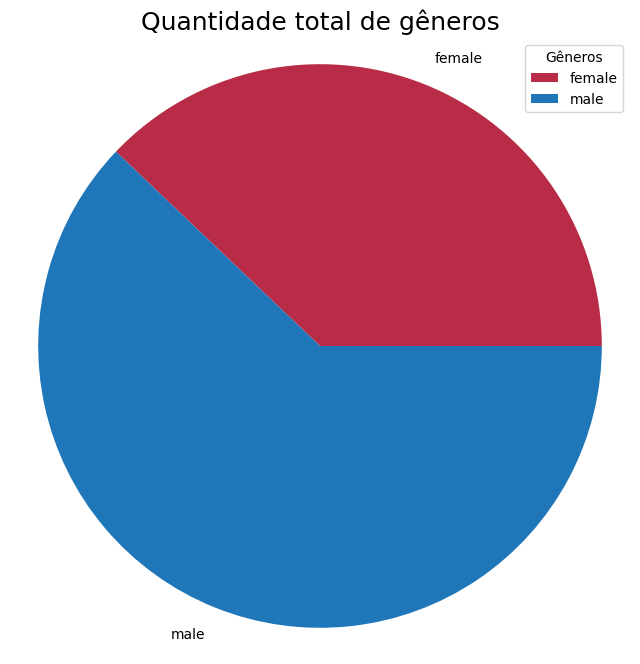

In [ ]:
# proporção geral do IFRN
d = gender.Detector()

# Pré-processamento (definações de gêneros)
pessoas = []
# dict com: nome, gênero, campus, função

# O dicionário dentro de pessoas
# "nome": "nome",
# "campus": "campus",
# "função": "função",
# "gênero": "gênero"

gen = {}

# pegando os dados

for index, row in df[['nome', 'campus', 'funcao']].iterrows():
  dic_p = {
      "nome": row[0].split()[0],
      "campus": row[1],
      "funcao": row[2]
  }

  pessoas.append(dic_p)
   # adicionando os dados na lista pessoas


# Determinando o gênero pelo nome

for s in pessoas:
  genero = d.get_gender(s["nome"])

  s["genero"] = genero

# Definindo gênero que tem é desconhecido

for i in pessoas:
  if i["genero"] == 'unknown':
    for k, v in tg.items():
      if k == i["nome"]:
        i["genero"] = v

# conto quantos homens e quantas mulheres há

for g in pessoas:
  key_gen = g["genero"].strip().lower()
  if key_gen not in gen.keys():
      gen[key_gen] = 1
  else:
      gen[key_gen] += 1

# quantidade de cada sexo
labels = []
vals = []

for i in gen.keys():
  print(f'Há {gen[i]} pessoas {i}')
  if i in ['male', 'female']:
    labels.append(i)
    vals.append(gen[i])

# gráfico1

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#b82c47', '#1f76b8']

ax.pie(vals, labels=labels, colors=colors)

ax.axis('equal')
ax.set_title('Quantidade total de gêneros', fontsize = 18)
plt.legend(title='Gêneros')

plt.show()

ZL: 39.68% de mulheres, 60.32% de homens e 0.00% de outros.
A diferença em ZL é de gênero é 20.63%.
MO: 33.52% de mulheres, 65.36% de homens e 1.12% de outros.
A diferença em MO é de gênero é 31.84%.
ZN: 37.10% de mulheres, 62.90% de homens e 0.00% de outros.
A diferença em ZN é de gênero é 25.81%.
JC: 32.69% de mulheres, 66.35% de homens e 0.96% de outros.
A diferença em JC é de gênero é 33.65%.
RE: 43.66% de mulheres, 56.34% de homens e 0.00% de outros.
A diferença em RE é de gênero é 12.68%.
CA: 37.61% de mulheres, 61.47% de homens e 0.92% de outros.
A diferença em CA é de gênero é 23.85%.
SGA: 47.83% de mulheres, 50.43% de homens e 1.74% de outros.
A diferença em SGA é de gênero é 2.61%.
CNAT: 35.94% de mulheres, 63.35% de homens e 0.71% de outros.
A diferença em CNAT é de gênero é 27.40%.
PF: 29.36% de mulheres, 70.64% de homens e 0.00% de outros.
A diferença em PF é de gênero é 41.28%.
SPP: 40.35% de mulheres, 59.65% de homens e 0.00% de outros.
A diferença em SPP é de gênero é 1

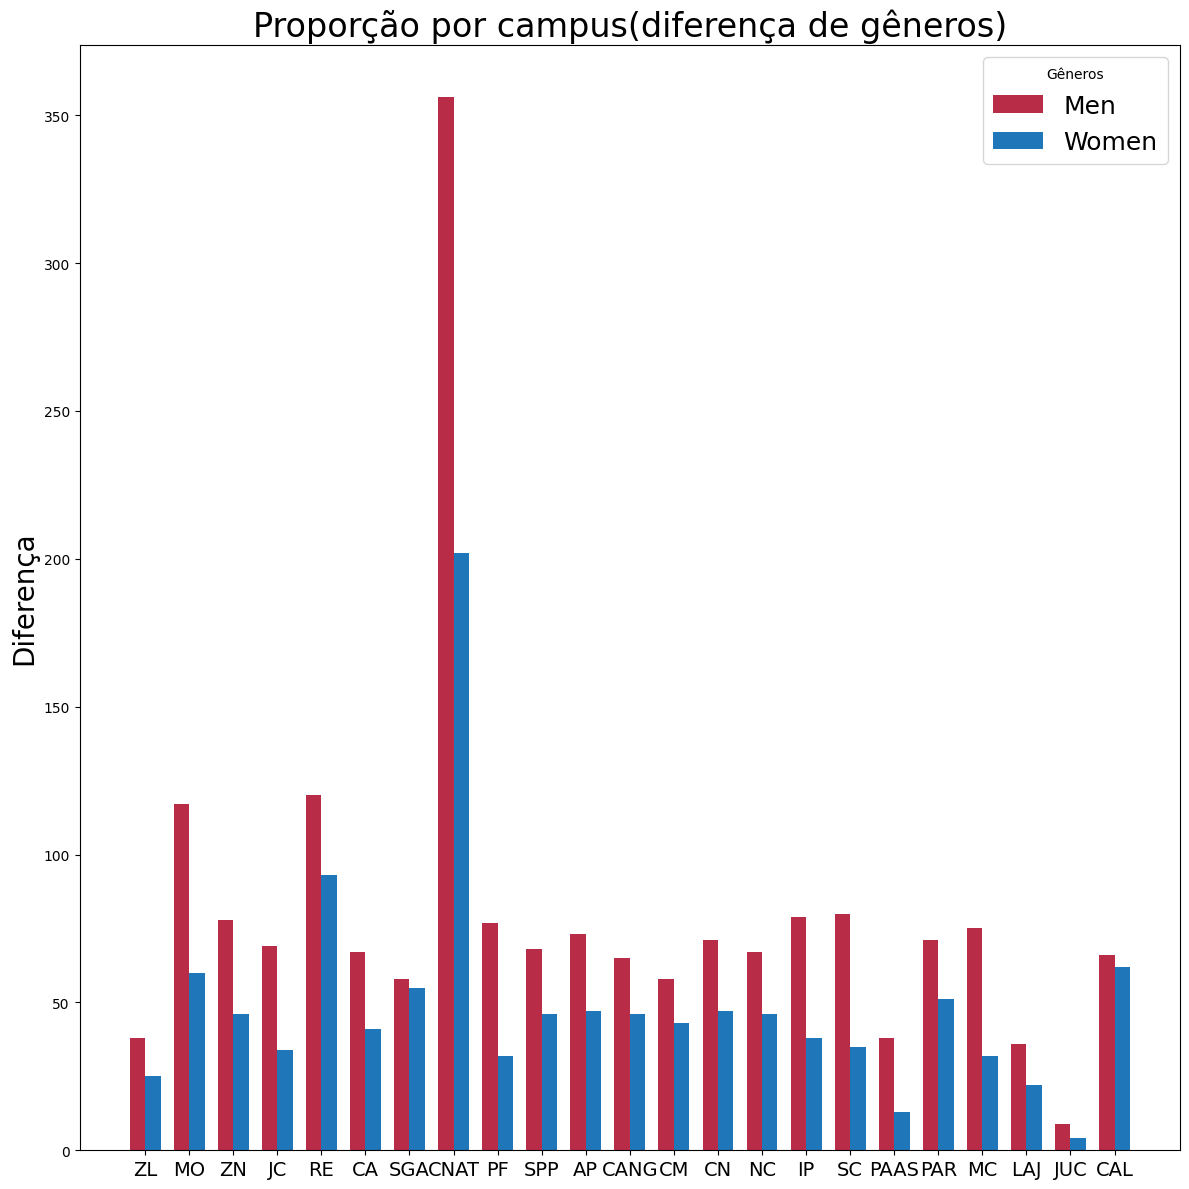

In [ ]:
# Proporção por campus(diferença de gêneros)

campus = {}

for i in pessoas:
  if i['campus'] not in campus:
    campus[i['campus']] = {
        "female": 0,
        "male": 0,
        "others": 0
    }

  for k in campus.keys():
    if i['campus'] == k:
      if i["genero"].strip().lower() == "female":
        campus[k]["female"] += 1
      elif i["genero"].strip().lower() == "male":
        campus[k]["male"] += 1
      else:
        campus[k]["others"] += 1

labels = []
men_means = []
women_means = []

for g in campus.keys():
  female = campus[g]["female"]
  male = campus[g]["male"]
  others = campus[g]["others"]
  all = female + male + others

  labels.append(g)
  men_means.append(male)
  women_means.append(female)

  print(f'{g}: {(female/all)*100:.2f}% de mulheres, {(male/all)*100:.2f}% de homens e {(others/all)*100:.2f}% de outros.')
  print(f'A diferença em {g} é de gênero é {(((male/all)*100) - ((female/all)*100)):.2f}%.')

# Gráfico2

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 12))
rects1 = ax.bar(x - width/2, men_means, width, label='Men',color='#b82c47')
rects2 = ax.bar(x + width/2, women_means, width, label='Women',color='#1f76b8')

ax.set_ylabel('Diferença',fontsize = 20)
ax.set_title('Proporção por campus(diferença de gêneros)', fontsize = 24)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 14)
plt.legend(title='Gêneros', fontsize = 18)

fig.tight_layout()

plt.show()

735 funcionários são remunerados.
2237 funcionários são não remunerados.
Há {'FAG': 39, 'SUB': 48, 'FUC': 25, 'FG': 88, 'CD': 30, 'FAA': 2, 'FACC': 2} essas funções sendo realizadas por female.
Há {'CD': 77, 'FG': 184, 'SUB': 74, 'FUC': 103, 'FAG': 55, 'FACC': 4, 'FAA': 1} essas funções sendo realizadas por male.
Há {} essas funções sendo realizadas por unknown.
Há {'SUB': 1} essas funções sendo realizadas por mostly_male.
Há {'FG': 1} essas funções sendo realizadas por andy.
Há {'SUB': 1} essas funções sendo realizadas por mostly_female.


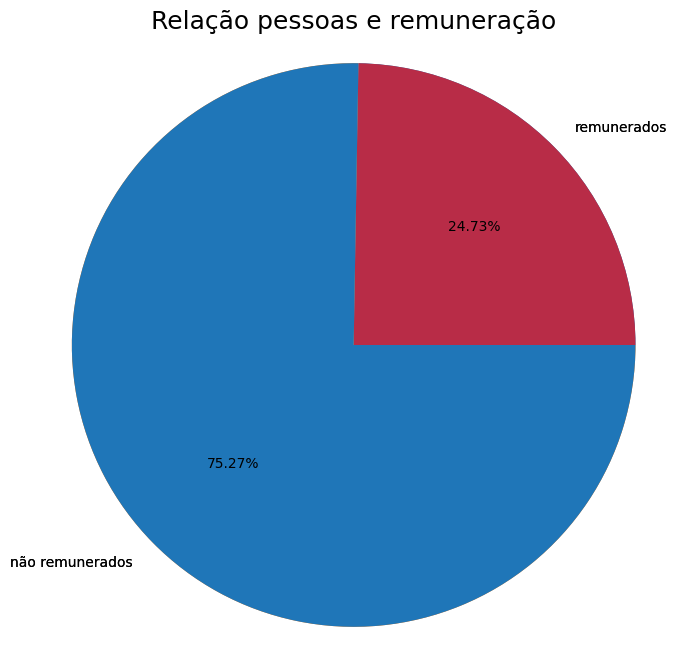

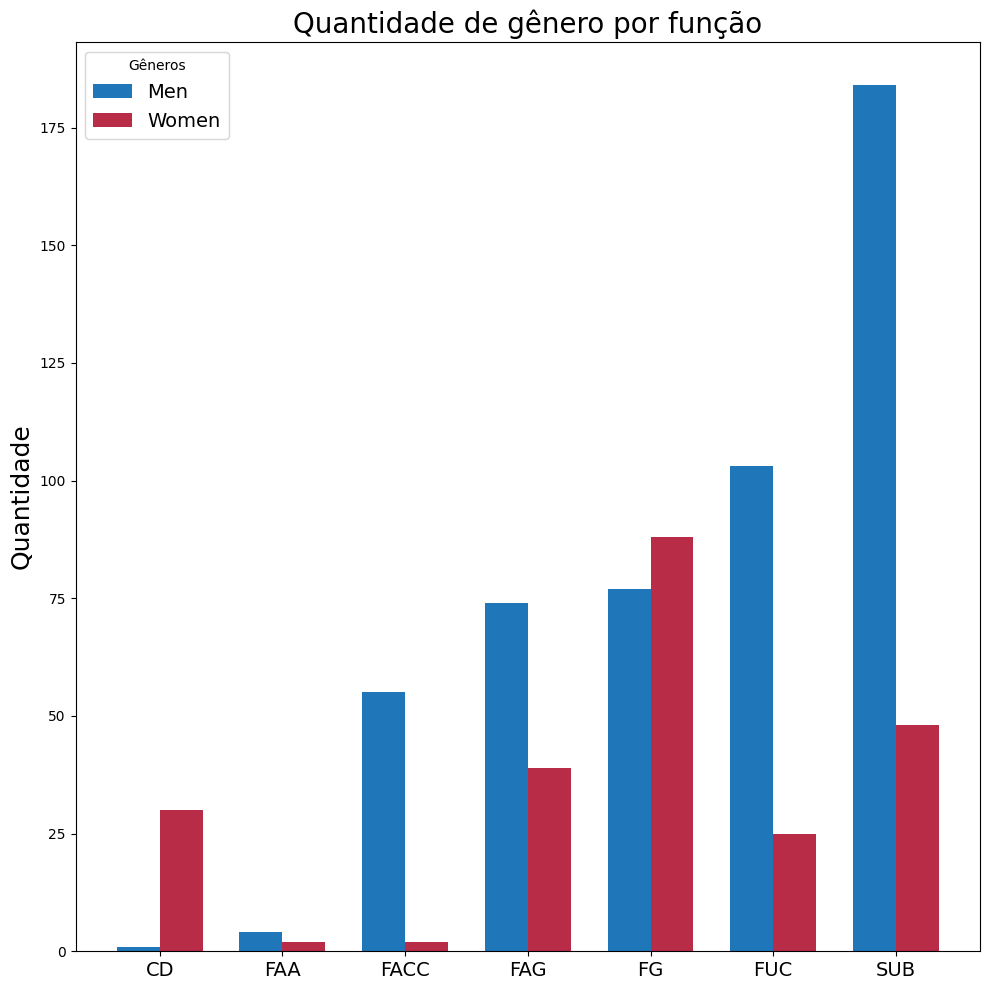

In [ ]:
# analise 1 dos cargos gerais

# Pegando funções das pesssoas
# remunerados (chefes de setores) ou não

fun = {}

rem = {
    'remunerados': 0,
    'não remunerados': 0
}

for f in pessoas:
  funcao = f["funcao"]
  genero = f["genero"].strip()

  if genero not in fun.keys():
    fun[genero] = {}

  if len(funcao) > 0:

    rem["remunerados"] += 1
    # Cargos remunerados

# Pessoas com mais de uma função
    if len(funcao) > 1:
      for i in funcao:
        if i in ['FG', 'CD']:

  # Caso algumas seja FG ou CD

          funcao = i
          break

        # Se nenhuma das funções for FG ou CD

        funcao = i

    else:
       # Pessoas com uma função

      funcao = funcao[0]

    cargo = ''

    for l in funcao:
      if l in ' 0123456789-':
        break
      cargo += l
    if cargo not in fun[genero].keys():
      fun[genero][cargo] = 0
    fun[genero][cargo] += 1

  else:
    rem['não remunerados'] += 1

    # Cargos não remunerados

for k, v in rem.items():
  print(f'{v} funcionários são {k}.')

   # Total de cargos remunerados ou não

for k, v in fun.items():
  print(f'Há {v} essas funções sendo realizadas por {k}.')

  # Total de cargos ocupados por pessoas

# Gráfico geral

vals = [rem['remunerados'], rem['não remunerados']]
labels = ['remunerados', 'não remunerados']

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#b82c47', '#1f76b8']
ax.pie(vals, labels=labels)
ax.pie(vals, labels=labels,colors=colors,
       autopct = '%.2f%%')
ax.axis('equal')
ax.set_title('Relação pessoas e remuneração', fontsize=18)

plt.show()

#Gráfico funções

labels = []
men_means = []
women_means = []

for k, v in sorted(fun['female'].items()):
  women_means.append(v)
  labels.append(k)

for v in sorted(fun['male'].values()):
  men_means.append(v)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, men_means, width, label='Men',color='#1f76b8')
rects2 = ax.bar(x + width/2, women_means, width, label='Women',color='#b82c47')
ax.set_ylabel('Quantidade', fontsize = 18)
ax.set_title('Quantidade de gênero por função', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 14)
plt.legend(title='Gêneros', fontsize = 14)

fig.tight_layout()


plt.show()


As mulheres ocupam 31.13% dos cargos de chefia.


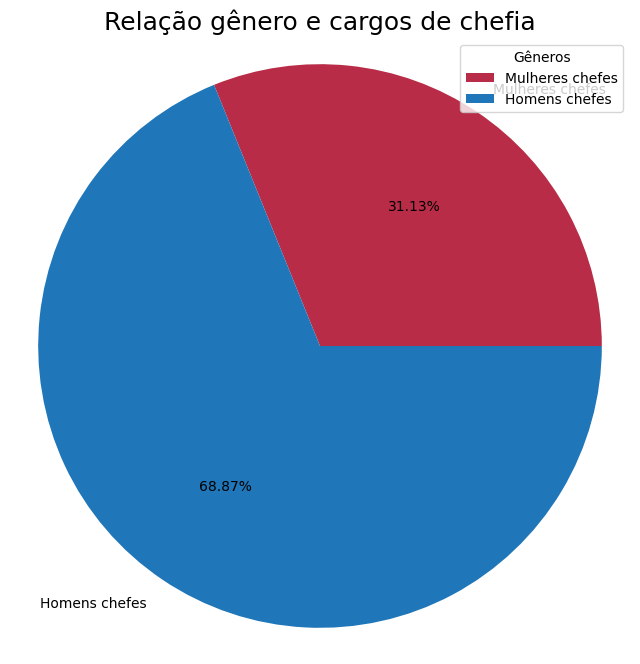

In [ ]:
# Quantas mulheres ocupam cargos de chefia(chefes de setor)
female_apoio = 0
female_cd = fun['female']['CD']
female_fg = fun['female']['FG']

male_apoio = 0
male_cd = fun['male']['CD']
male_fg = fun['male']['FG']

tot_females = female_cd + female_fg # total de mulheres com cargo de chefia

tot_males = male_cd + male_fg # total de homens com cargo de chefia

prop_chefia_female = (tot_females/(tot_females + tot_males)) * 100

print(f'As mulheres ocupam {prop_chefia_female:.2f}% dos cargos de chefia.')

#Gráfico

vals = [tot_females, tot_males]
labels = ['Mulheres chefes', 'Homens chefes']
colors = ['#b82c47', '#1f76b8']

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(vals, labels=labels, colors=colors,
       autopct = '%.2f%%')
ax.axis('equal')
ax.set_title('Relação gênero e cargos de chefia', fontsize=18)
plt.legend(title='Gêneros')

plt.show()


O cargo com mais representatividade feminina é o FG com 88 funcionários.


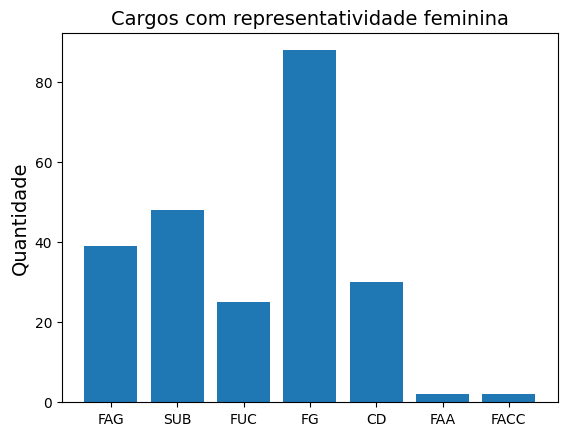

In [ ]:
# cargo com maior representatividade

# O Cargo com mais representatividade feminina

labels = []
vals = []

for count, k in enumerate(fun['female'].keys()):
  labels.append(k)
  vals.append(fun['female'][k])
  if count == 0:
    op = fun['female'][k]
    op_k = k

  if fun['female'][k] > op:
    op = fun['female'][k]
    op_k = k

print(f"O cargo com mais representatividade feminina é o {op_k} com {op} funcionários.")

#Gráfico

fig, ax = plt.subplots()


ax.bar(labels, vals)

ax.set_ylabel('Quantidade', fontsize = 14)
ax.set_title('Cargos com representatividade feminina', fontsize = 14)

plt.show()



Apodi: 48.06% de mulheres, 51.16% de homens e 0.78% de outros.


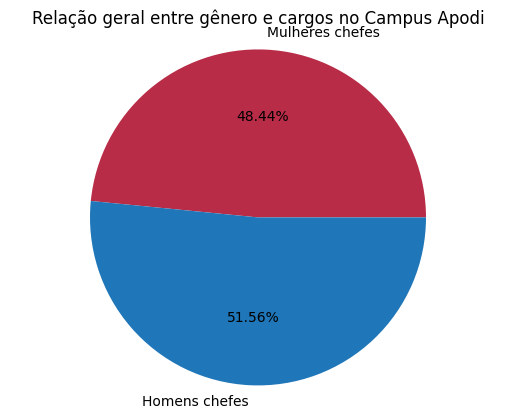

In [ ]:
# Especificamente de Apodi(Proproção geral)
ap = campus["AP"]
female_ap = ap["female"]
male_ap = ap["male"]
ap_means_f = []
ap_means_m = []

    # Mulheres
# campus_means_f.append(female)
ap_means_f.append(female_ap)

    # Homens
# campus_means_m.append(male)
ap_means_m.append(male_ap)

por_f = (female/all)*100
por_m = (male/all)*100
por_o = (others/all)*100

print(f'Apodi: {por_f:.2f}% de mulheres, {por_m:.2f}% de homens e {por_o:.2f}% de outros.')

# Gráfico

vals = [por_f, por_m]
labels = ['Mulheres chefes', 'Homens chefes']
colors = ['#b82c47', '#1f76b8']
fig, ax = plt.subplots()

ax.pie(vals, labels=labels, colors=colors,
       autopct = '%.2f%%')
ax.axis('equal')
ax.set_title('Relação geral entre gênero e cargos no Campus Apodi')


plt.show()

Há 1 mulher(es) como CD e 4 mulher(es) em FG no campus Apodi.
Totalizando 5 mulheres ocupando cargos de chefia em Apodi.
Representando uma 29.41% dos cargos de chefia no campus Apodi.


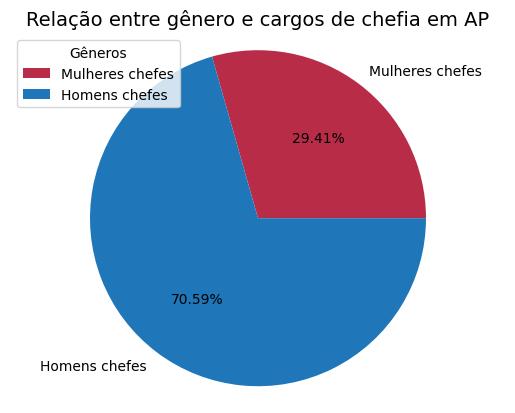

In [ ]:
# Cargos de chefia campus Apodi

fun_apodi = {}
# Funções de todos no campus APODI

female_fun = {}
# Funções femeninas do campus APODI

male_fun = {}
# Funções masculinas do campus APODI

for i in pessoas:
  # Pegando os dados de pessoas para separar por gênero

  gen_ap = i['genero'].strip()
  funcao_ap = i['funcao']

  if len(funcao_ap) > 0:

    if gen_ap not in fun_apodi.keys():
      fun_apodi[gen_ap] = []

    if funcao_ap[0][-3:] == '/AP':
      fun_apodi[gen_ap].append(funcao_ap)

for i in fun_apodi['female']:

  # Armazenando as funções dos mulheres do campus APODI

  if len(i) > 1:

     # caso tenha mais de uma função

    for q in i:
      cargo = ''
      for l in q:
        if l in '0123456789- ':
          break
        cargo += l

      if cargo in ['FG', 'CD']:
        break
    if cargo not in female_fun.keys():
      female_fun[cargo] = 0

    female_fun[cargo] += 1

  else: # Se não tiver mais de uma função
      cargo = ''
      for l in i[0]:
        if l in '0123456789- ':
          break
        cargo += l

      if cargo not in female_fun.keys():
        female_fun[cargo] = 0

      female_fun[cargo] += 1

for i in fun_apodi['male']: # Armazenando as funções dos homens do campus APODI
  if len(i) > 1: # caso tenha mais de uma função
    for q in i:
      cargo = ''
      for l in q:
        if l in '0123456789- ':
          break
        cargo += l

      if cargo in ['FG', 'CD']:
        break
    if cargo not in male_fun.keys():
      male_fun[cargo] = 0

    male_fun[cargo] += 1

  else: # Se não tiver mais de uma função
      cargo = ''
      for l in i[0]:
        if l in '0123456789- ':
          break
        cargo += l

      if cargo not in male_fun.keys():
        male_fun[cargo] = 0

      male_fun[cargo] += 1

m_chefia = female_fun['CD'] + female_fun['FG'] # Total de mulheres chefes em APODI
h_chefia = male_fun['CD'] + male_fun['FG']  # Total de homens chefes em APODI

print(f"Há {female_fun['CD']} mulher(es) como CD e {female_fun['FG']} mulher(es) em FG no campus Apodi.\nTotalizando {female_fun['CD'] + female_fun['FG']} mulheres ocupando cargos de chefia em Apodi.")
print(f"Representando uma {(m_chefia/(m_chefia + h_chefia)) * 100:.2f}% dos cargos de chefia no campus Apodi.")
# Gráfico

vals = [m_chefia, h_chefia]
labels = ['Mulheres chefes', 'Homens chefes']
colors = ['#b82c47', '#1f76b8']
fig, ax = plt.subplots()

ax.pie(vals, labels=labels, colors=colors,
       autopct = '%.2f%%')
ax.axis('equal')
ax.set_title('Relação entre gênero e cargos de chefia em AP', fontsize=14)
plt.legend(title='Gêneros')

plt.show()

A proporção de mulheres entre AP e ZL é de 1.01% maior.
A diferença de proporções de homens entre AP e ZL é de 0.99% menor.
A proporção de mulheres entre AP e JC é de 0.83% menor.
A diferença de proporções de homens entre AP e JC é de 1.09% maior.
A proporção de mulheres entre AP e RE é de 1.11% maior.
A diferença de proporções de homens entre AP e RE é de 0.93% menor.
A proporção de mulheres entre AP e SGA é de 1.22% maior.
A diferença de proporções de homens entre AP e SGA é de 0.83% menor.
A proporção de mulheres entre AP e SPP é de 1.03% maior.
A diferença de proporções de homens entre AP e SPP é de 0.98% menor.
A proporção de mulheres entre AP e CANG é de 1.06% maior.
A diferença de proporções de homens entre AP e CANG é de 0.96% menor.
A proporção de mulheres entre AP e CM é de 1.07% maior.
A diferença de proporções de homens entre AP e CM é de 0.93% menor.
A proporção de mulheres entre AP e CN é de 1.01% maior.
A diferença de proporções de homens entre AP e CN é de 0.98% menor.


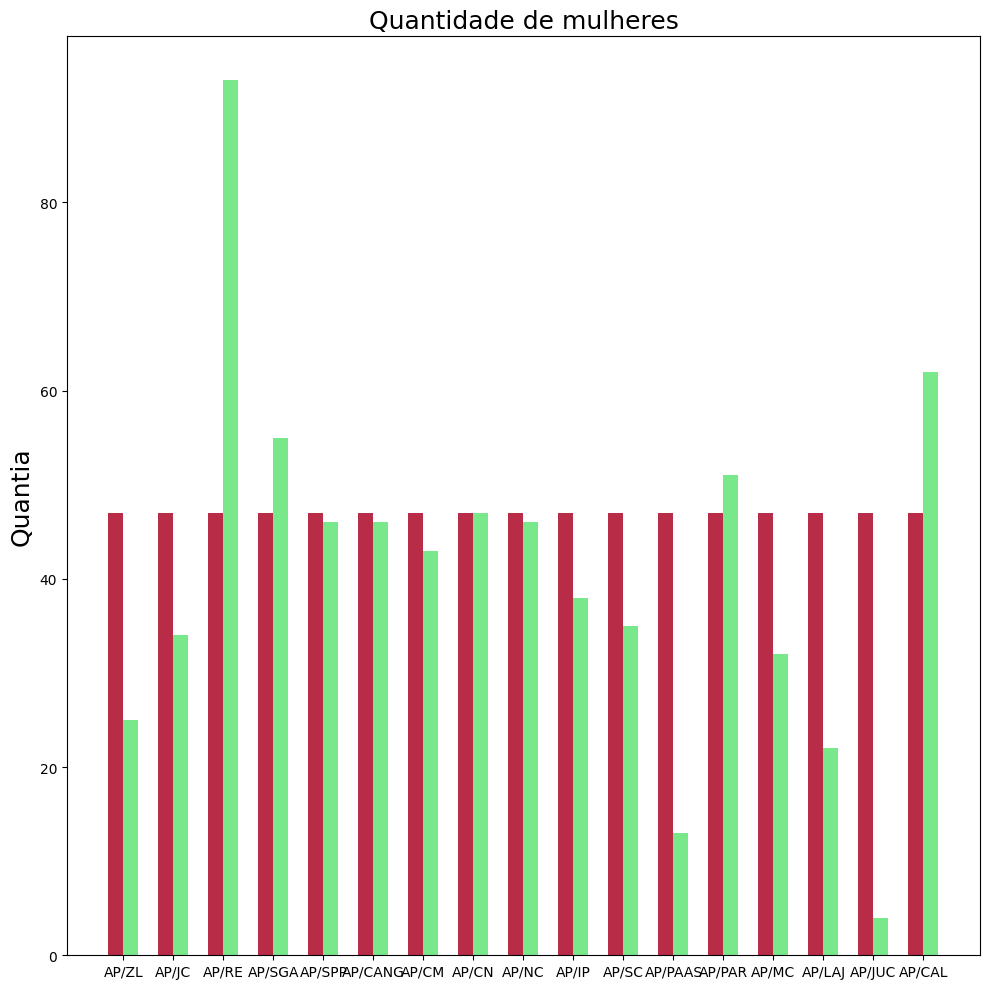

In [ ]:
# Ainda desta nota, o Portal do IFRN citou outros 4 campus, entre os 30 com melhores colocações:
# o Campus-Central, o Campus Mossoró, o Campus Natal-Zona Norte, e o Campus Caicó e o Campus Pau dos Ferros,
# compare os quanto a presença feminina.

# AP = Apodi
# CNAT = Natal Central
# MO = Mossoró
# ZN =  Zona Norte
# CA = Caicó
# PF = Pau dos Ferros

# Comparar o campus com os demais
campus_nordeste = ["CNAT", "MO", "ZN", "CA", "PF"]

ap = campus["AP"]
female_ap = ap["female"]
male_ap = ap["male"]
others_ap = ap["others"]

all_ap = female_ap + male_ap + others_ap

por_f_ap = (female_ap/all_ap)*100
por_m_ap = (male_ap/all_ap)*100
por_o_ap = (others_ap/all_ap)*100

labels = []
ap_means_f = []
campus_means_f = []
ap_means_m = []
campus_means_m = []



for i in campus:
  if i not in campus_nordeste and i != "AP":
    female = campus[i]["female"]
    male = campus[i]["male"]
    others = campus[i]["others"]
    all = female + male + others

    label_ap = 'AP/' + i
    labels.append(label_ap)

    # Mulheres
    campus_means_f.append(female)
    ap_means_f.append(female_ap)

    # Homens
    campus_means_m.append(male)
    ap_means_m.append(male_ap)

    por_f = (female/all)*100
    por_m = (male/all)*100
    por_o = (others/all)*100

    res_f = 'menor'
    res_m = 'menor'
    if por_f > por_f_ap:
      res_f = 'maior'

    if por_m > por_m_ap:
      res_m = 'maior'

    print(f'A proporção de mulheres entre AP e {i} é de {por_f/por_f_ap:.2f}% {res_f}.')
    print(f'A diferença de proporções de homens entre AP e {i} é de {por_m/por_m_ap:.2f}% {res_m}.')

# Gráfico Mulheres

x = np.arange(len(labels))
width = 0.30

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, ap_means_f, width,color='#b82c47')
rects2 = ax.bar(x + width/2, campus_means_f, width,color='#79e88b')
ax.set_ylabel('Quantia', fontsize = 18)
ax.set_title('Quantidade de mulheres', fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()


A proporção de mulheres entre AP e CNAT é de 0.92% menor.
A diferença de proporções de homens entre AP e CNAT é de 1.04% maior.
A proporção de mulheres entre AP e MO é de 0.86% menor.
A diferença de proporções de homens entre AP e MO é de 1.07% maior.
A proporção de mulheres entre AP e ZN é de 0.95% menor.
A diferença de proporções de homens entre AP e ZN é de 1.03% maior.
A proporção de mulheres entre AP e CA é de 0.96% menor.
A diferença de proporções de homens entre AP e CA é de 1.01% maior.
A proporção de mulheres entre AP e PF é de 0.75% menor.
A diferença de proporções de homens entre AP e PF é de 1.16% maior.


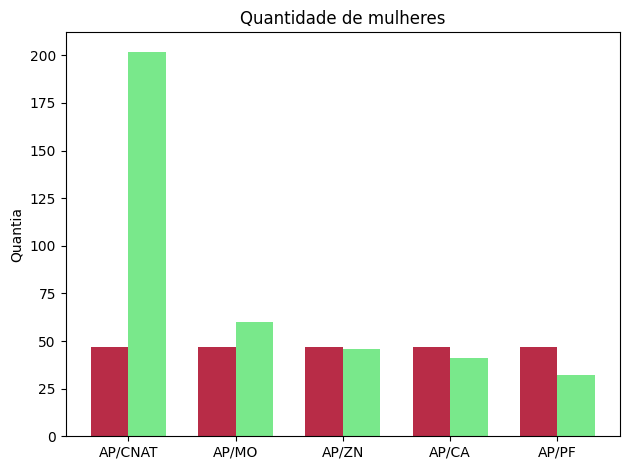

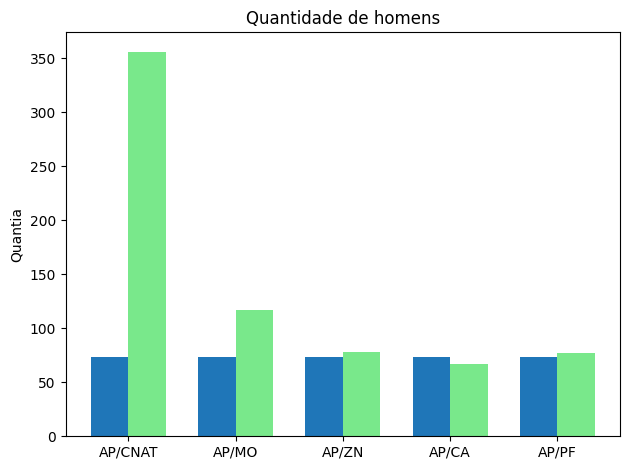

In [ ]:
# Comparar o campus com os demais

campus_nordeste = ["CNAT", "MO", "ZN", "CA", "PF"]

ap = campus["AP"]
female_ap = ap["female"]
male_ap = ap["male"]
others_ap = ap["others"]

all_ap = female_ap + male_ap + others_ap

por_f_ap = (female_ap/all_ap)*100
por_m_ap = (male_ap/all_ap)*100
por_o_ap = (others_ap/all_ap)*100

labels = []
ap_means_f = []
campus_means_f = []
ap_means_m = []
campus_means_m = []

for i in campus_nordeste:
  female = campus[i]["female"]
  male = campus[i]["male"]
  others = campus[i]["others"]
  all = female + male + others

  label_ap = 'AP/' + i
  labels.append(label_ap)
  # Mulheres
  campus_means_f.append(female)
  ap_means_f.append(female_ap)

  # Homens
  campus_means_m.append(male)
  ap_means_m.append(male_ap)

  por_f = (female/all)*100
  por_m = (male/all)*100
  por_o = (others/all)*100

  res_f = 'menor'
  res_m = 'menor'
  if por_f > por_f_ap:
    res_f = 'maior'

  if por_m > por_m_ap:
    res_m = 'maior'

  print(f'A proporção de mulheres entre AP e {i} é de {por_f/por_f_ap:.2f}% {res_f}.')
  print(f'A diferença de proporções de homens entre AP e {i} é de {por_m/por_m_ap:.2f}% {res_m}.')

# Gráfico mulheres

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ap_means_f, width,color='#b82c47')
rects2 = ax.bar(x + width/2, campus_means_f, width,color='#79e88b')

ax.set_ylabel('Quantia')
ax.set_title('Quantidade de mulheres')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()

# Gráfico homens

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ap_means_m, width,color='#1f76b8')
rects2 = ax.bar(x + width/2, campus_means_m, width,color='#79e88b')

ax.set_ylabel('Quantia')
ax.set_title('Quantidade de homens')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()